In this project we aim to use our photos through the CNN. Thus, we first should process the photos and then use the machine to be trained and be able to predict.

In [1]:
import os

In [2]:
data_dir = 'D:\\University\\Zemestan 1402\\Prompt Eng Courses\\Tensorflow\\cell_images\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
from matplotlib.image import imread

in this stage we want to see how much data we have and what is the cleaning processing. So we try to understand the data. we want to explore our data set now!

we would head to open test folder to see what we have in it.

In [6]:
test_path=data_dir+'//test'
train_path=data_dir+'//train'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'//parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

As is clear, there are all photos here!

We can get the address of the first cell.

In [10]:
para_cell=train_path+'//parasitized'+'//C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell

'D:\\University\\Zemestan 1402\\Prompt Eng Courses\\Tensorflow\\cell_images\\cell_images//train//parasitized//C100P61ThinF_IMG_20150918_144104_cell_162.png'

We can read the image with the imread. The function would convert the image to 0 and 1 and in the matrix shape!

In [12]:
a=imread(para_cell)

In [13]:
a.shape

(148, 142, 3)

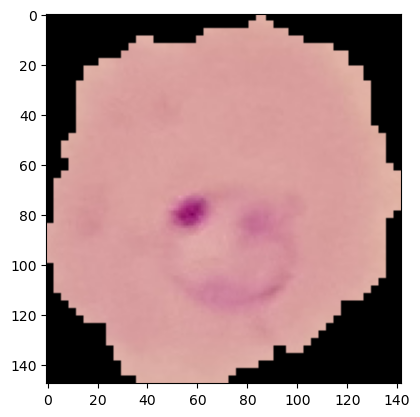

In [14]:
plt.imshow(a)

In [15]:
os.listdir(train_path+'//uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
un_infected_cell=train_path+'//uninfected'+'//C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
imread(train_path+'//uninfected'+'//C100P61ThinF_IMG_20150918_144104_cell_128.png').shape

(139, 160, 3)

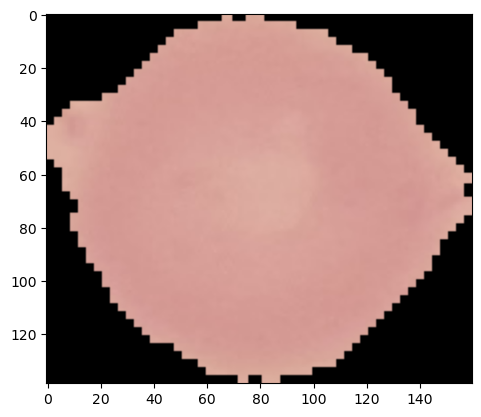

In [18]:
plt.imshow(imread(train_path+'//uninfected'+'//C100P61ThinF_IMG_20150918_144104_cell_128.png'))

There are two points here:

First of all we can clearly see that the infected cells have something on their centers and the uninfected ones have nothhing. 

The second point is the size of the images. They have different shapes. The machine cannot be trained on images that each one has a different shape (size). Thus we have to reshape them on the same size!!

Note: pwd writes the full pathname of the current working directory

In [19]:
pwd

'C:\\Users\\moham\\Tensorflow_traning'

The question is how many picture do we have?

In [20]:
type(os.listdir(train_path+'//uninfected'))

list

In [21]:
len(os.listdir(train_path+'//uninfected'))

12480

In [22]:
len(os.listdir(train_path+'//parasitized'))

12480

what is the average shape (size) of the pictures?

Note: the output of the .shape is a tupple and we can get the tupple elements and save on the different varaibles!

In [23]:
d1,d2,d3=imread(train_path+'//uninfected'+'//C100P61ThinF_IMG_20150918_144104_cell_128.png').shape

In [24]:
d1

139

In [25]:
d2

160

In [26]:
d3

3

In [27]:
dim1=[]
dim2=[]

for I in os.listdir(test_path+'//parasitized'):
    img=imread(test_path+'//parasitized//'+I)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


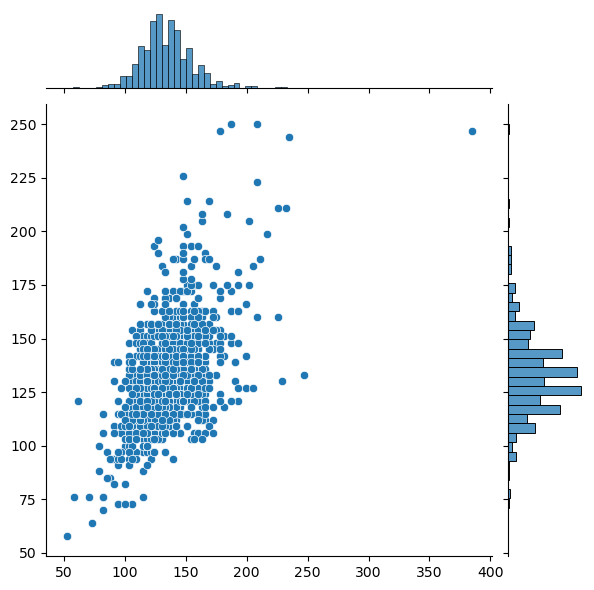

In [28]:
sns.jointplot(dim1,dim2)

Note: as is clear most of the images are sized around 130 and 130.

We can also check out the mean of the dim1 and dim2

In [29]:
np.mean(dim1)

134.64307692307693

In [30]:
np.mean(dim2)

133.31846153846155

In [53]:
image_shape=(130,130,3)

there for we can conver all the images to (130,130,3)

Note: First of all we have lots of data and training based on these amount of data could be time consuming.

The other thing is that the data size is big but the data quantity is not still enough!!

Moreover,  What if we have the same image but the image has some kind of rotation or tilt or some magnifiaction, or has been taken from a different angle?

For resolving these problems we can considering batching of the images as well as using image generator function.

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
#help(ImageDataGenerator)

Note: here our data is rescaled (the data is between 0 to 1) but if it is not rescaled we have to rescale it.
Note: sheared means giving tilt to the image (search sheard image on google).
Note: fill_mode= nearest means that if we want to strech the image we would fill if with the nearest data around that point.

In [42]:
image_gen=ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1,
                             horizontal_flip=True,
                            fill_mode='nearest')

Let's tedt the image generator

In [43]:
a=imread(para_cell)

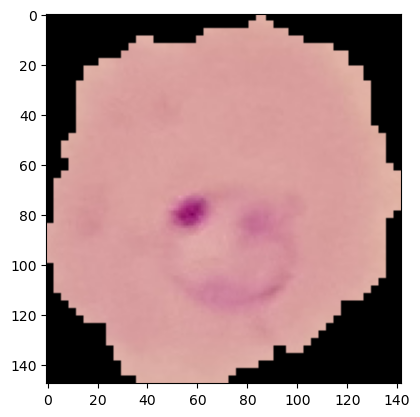

In [44]:
plt.imshow(a)

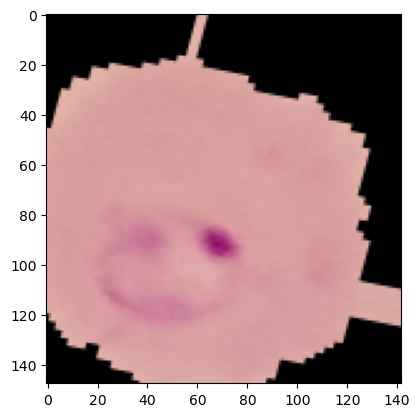

In [46]:
plt.imshow(image_gen.random_transform(a))

Note:We refer to it as a "random transformation" because each call to the random_transform method applies a randomly chosen combination of the specified augmentation settings to the image. Although the range and types of transformations (such as rotation, zooming, width/height shifts, etc.) are predefined, the specific values used for each transformation within those ranges are randomly determined for each image.

Here's why it's called "random transformation":

Random Selection within Ranges:

For a parameter like rotation_range=20, each call to random_transform will rotate the image by a random angle between -20 and +20 degrees.
For a parameter like zoom_range=0.1, each call will zoom the image by a random factor between 0.9 and 1.1 (since 0.1 means ±10% zoom).

In [47]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


Note: How does it know that it has two classes?

becuase we have already organized all the pictures in two categorize (two folders). Please be notified that you have to categorize them like this.

In [48]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [74]:
from tensorflow.keras.models import Sequential

In [75]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Dropout,Flatten

Note: Rules for selecting CNN model parameters:
https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

In [76]:
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'] )


In [77]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 62, 62, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [79]:
early_stop=EarlyStopping(monitor='val_loss', patience=2)

Note: training the huge data takes time. Thus we have to make some bathes.

In [80]:
batch_size=16

In [81]:
train_image_gen=image_gen.flow_from_directory(train_path, 
                                             target_size=(130,130),
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [82]:
test_image_gen=image_gen.flow_from_directory(test_path, 
                                             target_size=(130,130),
                                             color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                            shuffle=False)

Found 2600 images belonging to 2 classes.


Note: what does shuffle mean?
to mix a set of playing cards without seeing their values before beginning a game, so that their order is not known to any of the players.

If you do the shuffling here your label might be shuffled.

In [83]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [87]:
#results=model.fit(train_image_gen,epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Note: Since it takes lots of time and this file is more for training we would use a pre-trained model.